In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [40]:
DIRECTORY = r"D:/Datasets/BGYF_Dataset"
CATEGORIES = os.listdir(DIRECTORY)
CATEGORY_SIZE = len(CATEGORIES)
class_types  = CATEGORIES

# grab the list of images in our dataset directory, then initialize the list of data (i.e., images) and class images
threshold_one = (1, 1, 1)
threshold_two = (255, 255, 255)


for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    filelist = os.listdir(path)
    for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
        if not(fichier.endswith(".jpg")):
            filelist.remove(fichier)
    
    for img in filelist:
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.inRange(image, threshold_one, threshold_two)
        coords = np.array(np.nonzero(mask))
        top_left = np.min(coords, axis=1)
        bottom_right = np.max(coords, axis=1)
        out = image[top_left[0]:bottom_right[0],top_left[1]:bottom_right[1]]
        plt.imsave(os.path.join(path,img),out)
        

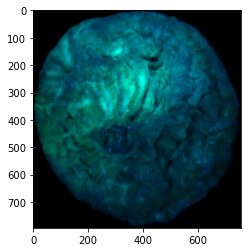

In [31]:


plt.imshow(out)
plt.show()

In [29]:
coords

array([[   0,    0,    0, ..., 1643, 1643, 1643],
       [   0,    1,    2, ..., 2301, 2302, 2303]], dtype=int64)

In [30]:
mask[0,0]

0